<a href="https://colab.research.google.com/github/golipraneetha/Data-Science/blob/main/Group_Project_Stats_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  install.packages("ggmap")
#  install.packages("ggplot2")
# library(ggmap)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Reading Data
filename <- "/content/201911-citibike-tripdata - 1_percent_of_orignal.csv"
df <- read.csv(filename)

In [ ]:
# Data Description
# print(round(file.info(filename)$size/1024/1024, 2))

# Columns
str(df)

'data.frame':	14787 obs. of  15 variables:
 $ tripduration           : int  1416 287 593 826 930 690 812 521 426 853 ...
 $ starttime              : chr  "2019-11-29 19:03:50.9830" "2019-11-27 07:09:03.6730" "2019-11-18 22:36:08.6850" "2019-11-06 11:44:07.8150" ...
 $ stoptime               : chr  "2019-11-29 19:27:27.2590" "2019-11-27 07:13:51.3970" "2019-11-18 22:46:02.4070" "2019-11-06 11:57:54.4200" ...
 $ start.station.id       : int  486 460 447 3129 3737 3323 3169 146 546 3221 ...
 $ start.station.name     : chr  "Broadway & W 29 St" "S 4 St & Wythe Ave" "8 Ave & W 52 St" "Queens Plaza North & Crescent St" ...
 $ start.station.latitude : num  40.7 40.7 40.8 40.8 40.7 ...
 $ start.station.longitude: num  -74 -74 -74 -73.9 -74 ...
 $ end.station.id         : int  79 3093 468 522 518 3552 3443 3002 519 3668 ...
 $ end.station.name       : chr  "Franklin St & W Broadway" "N 6 St & Bedford Ave" "Broadway & W 56 St" "E 51 St & Lexington Ave" ...
 $ end.station.latitude   : num  40.7 4

In [ ]:
# Change Data Type
df$starttime <- as.POSIXct(df$starttime)
df$stoptime <- as.POSIXct(df$stoptime)

df$start.station.id <- as.factor(df$start.station.id)
df$end.station.id <- as.factor(df$end.station.id)
df$bikeid <- as.factor(df$bikeid)
df$usertype <- as.factor(df$usertype)
df$gender <- as.factor(df$gender)

In [ ]:
# Recode Gender
df$gender <- recode(df$gender, "0" = "Unknown", "1" = "Male", "2" = "Female")

In [ ]:
# Check for NULL values
na_count <-sapply(df, function(y) sum(length(which(is.na(y)))))
data.frame(na_count)

,na_count
,<int>
tripduration,0
starttime,0
stoptime,0
start.station.id,0
start.station.name,0
start.station.latitude,0
start.station.longitude,0
end.station.id,0
end.station.name,0


In [ ]:
# Frequency Count of Gender
df %>% count(gender)

# Frequency Count of User Type
df %>% count(usertype)

gender,n
<fct>,<int>
Unknown,831
Male,10396
Female,3560


usertype,n
<fct>,<int>
Customer,1527
Subscriber,13260


[1] 12.83975

[1] 26.42538

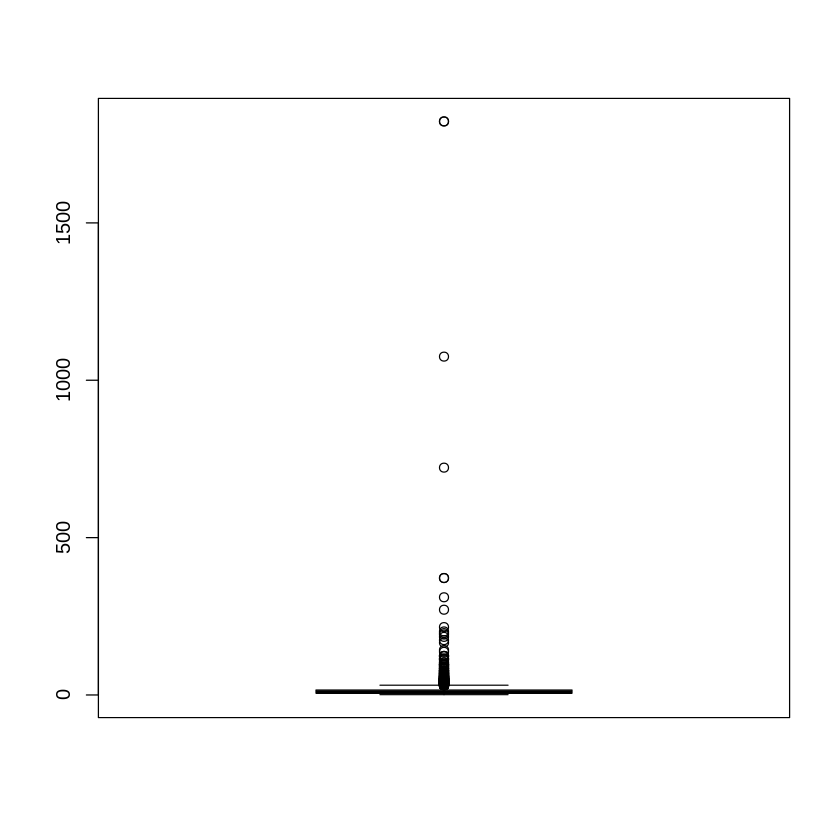

In [ ]:
# Convert tripduration from seconds to minutes
df$tripduration <- df$tripduration / 60
boxplot(df$tripduration)
mean(df$tripduration)
sd(df$tripduration)

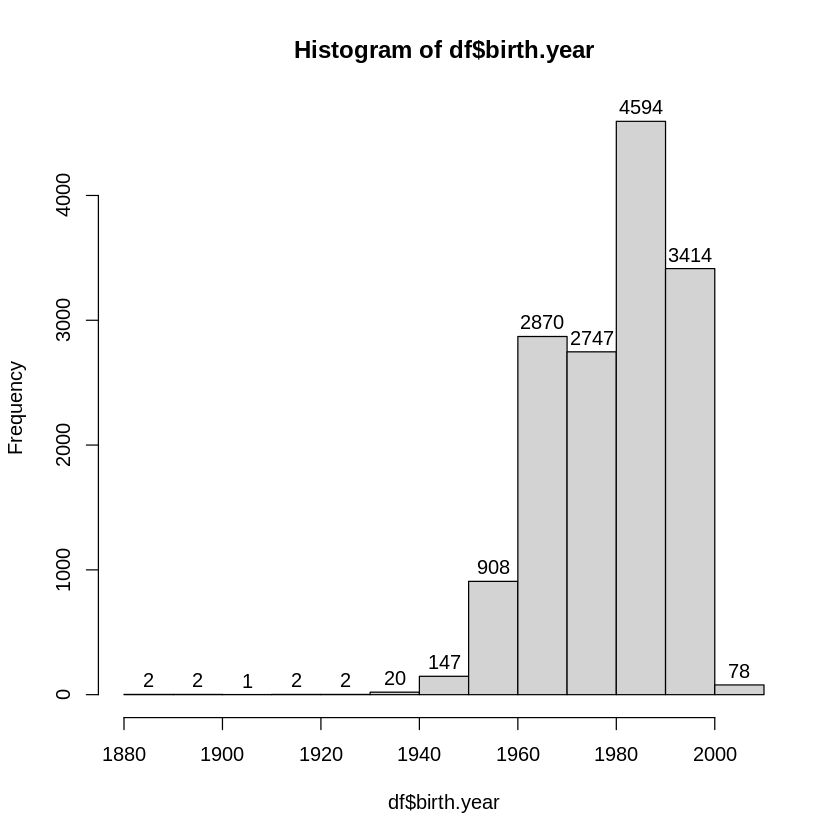

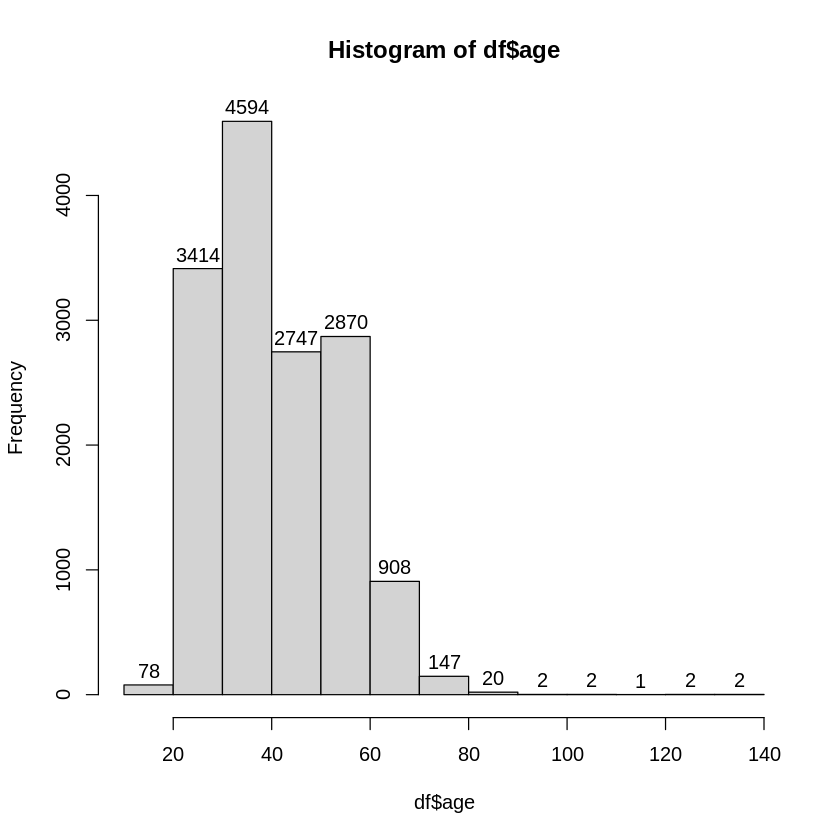

In [ ]:
# Change birth.year -> Age
hist(df$birth.year, labels = TRUE)
current.year <- 2021
df$age <- current.year - df$birth.year
hist(df$age, labels = TRUE)

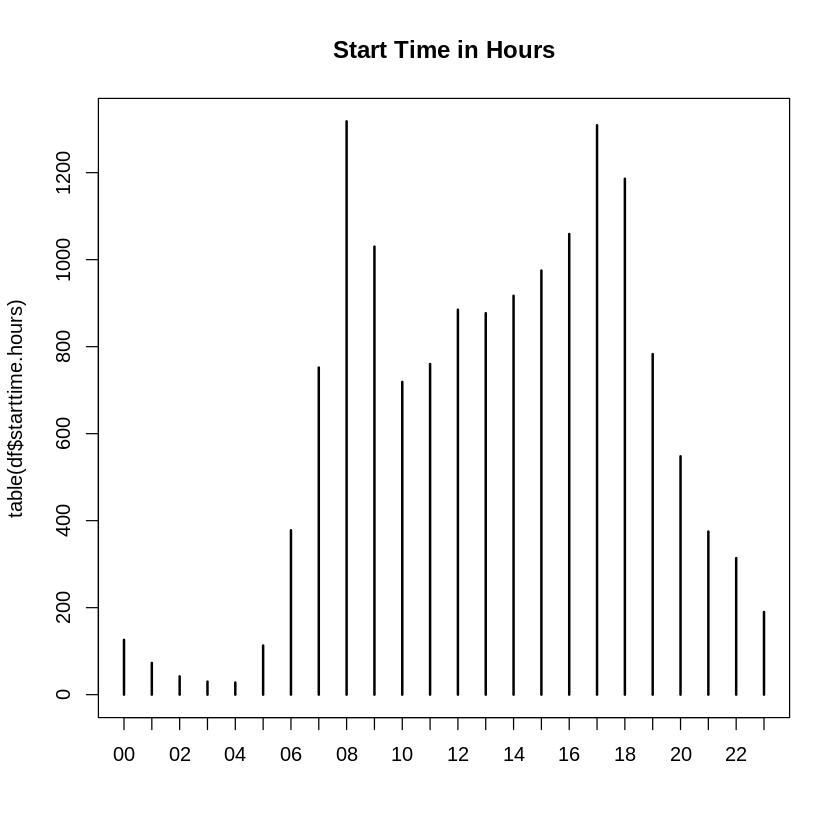

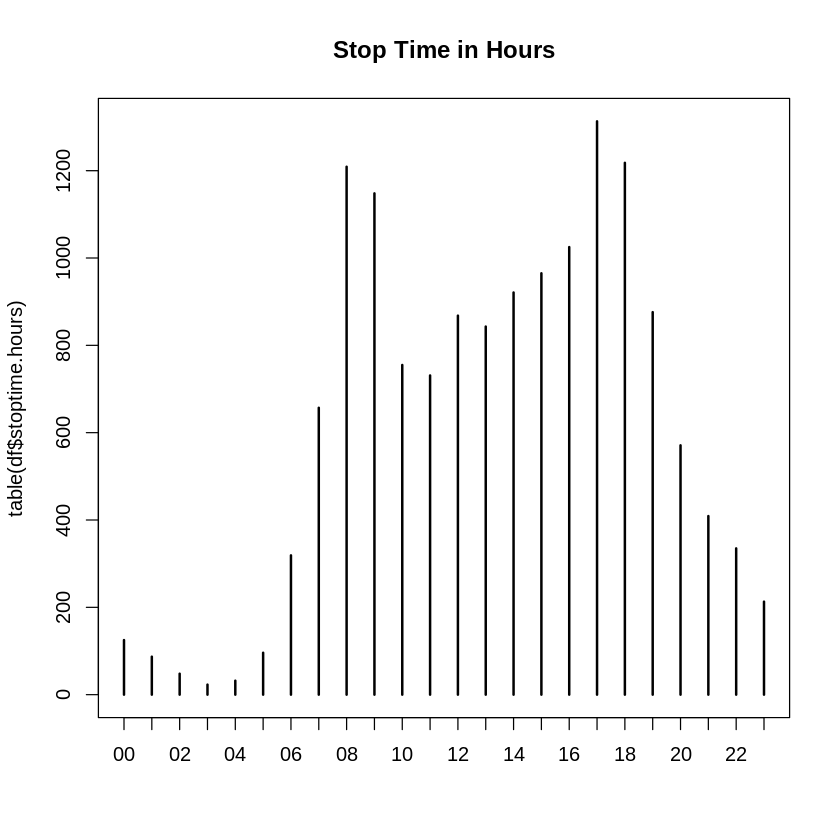

In [ ]:
# Create Hours Column
df$starttime.hours <- as.factor(format(df$starttime, "%H"))
df$stoptime.hours <- as.factor(format(df$stoptime, "%H"))
plot(table(df$starttime.hours), main = "Start Time in Hours")
plot(table(df$stoptime.hours), main = "Stop Time in Hours")

In [ ]:
str(df)

'data.frame':	14787 obs. of  18 variables:
 $ tripduration           : num  23.6 4.78 9.88 13.77 15.5 ...
 $ starttime              : POSIXct, format: "2019-11-29 19:03:50" "2019-11-27 07:09:03" ...
 $ stoptime               : POSIXct, format: "2019-11-29 19:27:27" "2019-11-27 07:13:51" ...
 $ start.station.id       : Factor w/ 813 levels "72","79","82",..: 218 195 186 346 723 445 381 12 261 390 ...
 $ start.station.name     : chr  "Broadway & W 29 St" "S 4 St & Wythe Ave" "8 Ave & W 52 St" "Queens Plaza North & Crescent St" ...
 $ start.station.latitude : num  40.7 40.7 40.8 40.8 40.7 ...
 $ start.station.longitude: num  -74 -74 -74 -73.9 -74 ...
 $ end.station.id         : Factor w/ 817 levels "72","79","82",..: 2 319 202 246 243 612 542 273 244 693 ...
 $ end.station.name       : chr  "Franklin St & W Broadway" "N 6 St & Bedford Ave" "Broadway & W 56 St" "E 51 St & Lexington Ave" ...
 $ end.station.latitude   : num  40.7 40.7 40.8 40.8 40.7 ...
 $ end.station.longitude  : num  -74 -

In [ ]:
# Remove Outliers
# Outliers for trip duration
td.upper_limit <- mean(df$tripduration) + 3 * sd(df$tripduration)
age.upper_limit <- mean(df$age) + 3 *sd(df$age)

filter_df <- df %>% filter(df$tripduration < td.upper_limit, df$age < age.upper_limit)
nrow(df)
nrow(filter_df)
max(filter_df$age)
max(df$age)

[1] 14787

[1] 14707

[1] 78

[1] 133

In [ ]:
str(filter_df)

'data.frame':	14707 obs. of  18 variables:
 $ tripduration           : num  23.6 4.78 9.88 13.77 15.5 ...
 $ starttime              : POSIXct, format: "2019-11-29 19:03:50" "2019-11-27 07:09:03" ...
 $ stoptime               : POSIXct, format: "2019-11-29 19:27:27" "2019-11-27 07:13:51" ...
 $ start.station.id       : Factor w/ 813 levels "72","79","82",..: 218 195 186 346 723 445 381 12 261 390 ...
 $ start.station.name     : chr  "Broadway & W 29 St" "S 4 St & Wythe Ave" "8 Ave & W 52 St" "Queens Plaza North & Crescent St" ...
 $ start.station.latitude : num  40.7 40.7 40.8 40.8 40.7 ...
 $ start.station.longitude: num  -74 -74 -74 -73.9 -74 ...
 $ end.station.id         : Factor w/ 817 levels "72","79","82",..: 2 319 202 246 243 612 542 273 244 693 ...
 $ end.station.name       : chr  "Franklin St & W Broadway" "N 6 St & Bedford Ave" "Broadway & W 56 St" "E 51 St & Lexington Ave" ...
 $ end.station.latitude   : num  40.7 40.7 40.8 40.8 40.7 ...
 $ end.station.longitude  : num  -74 -

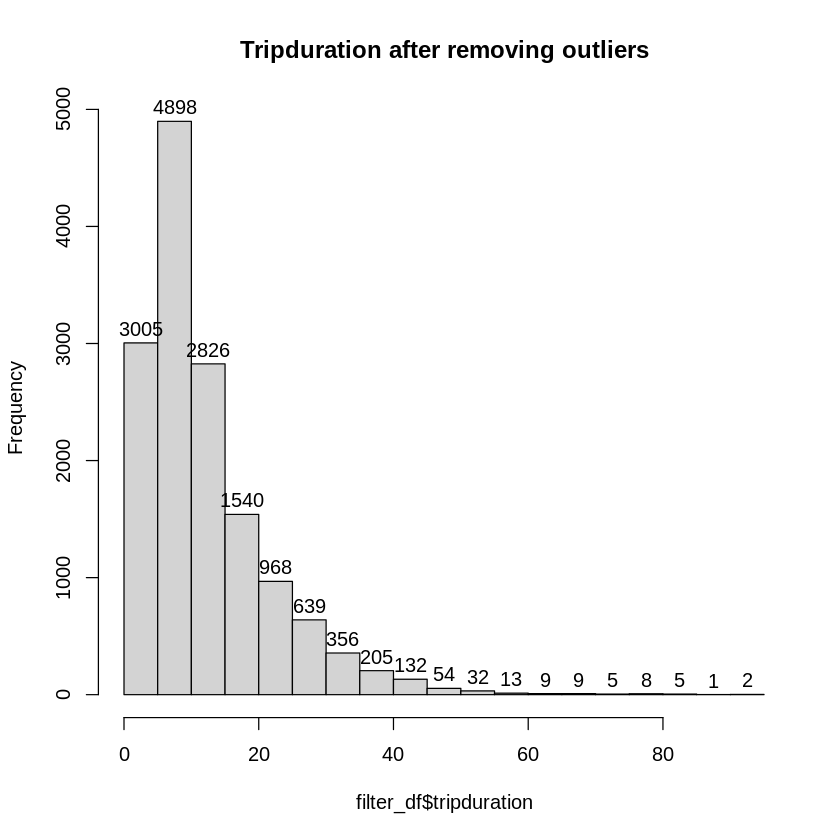

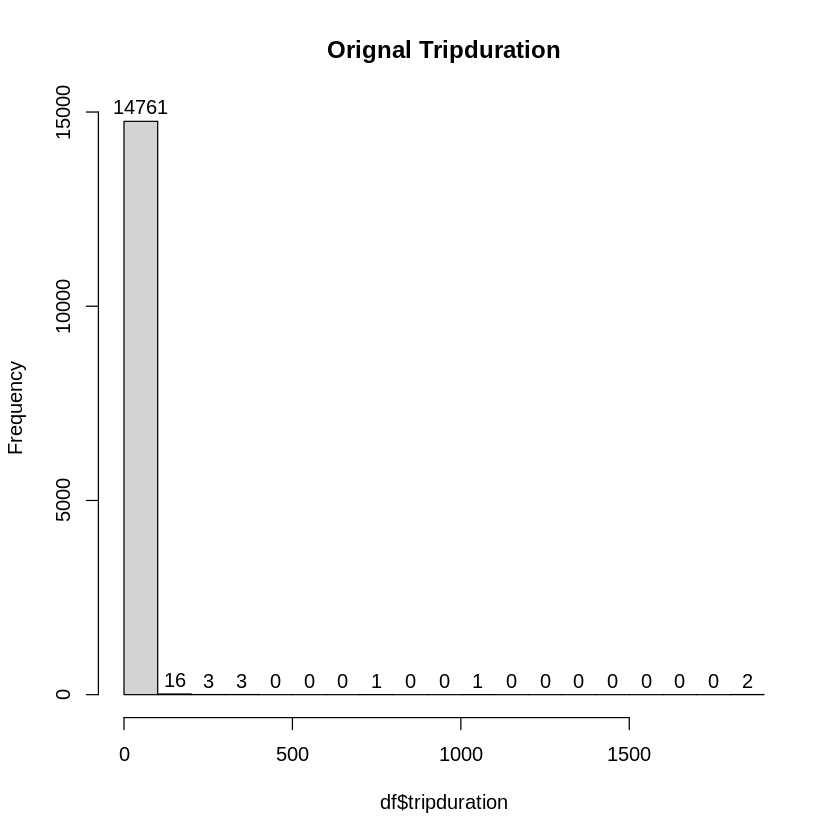

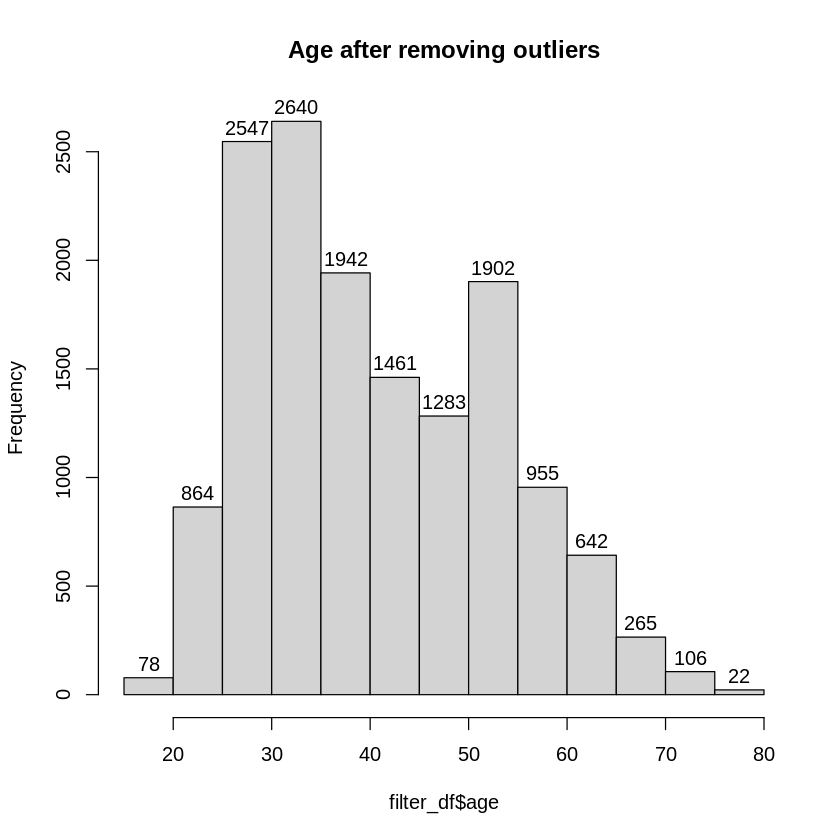

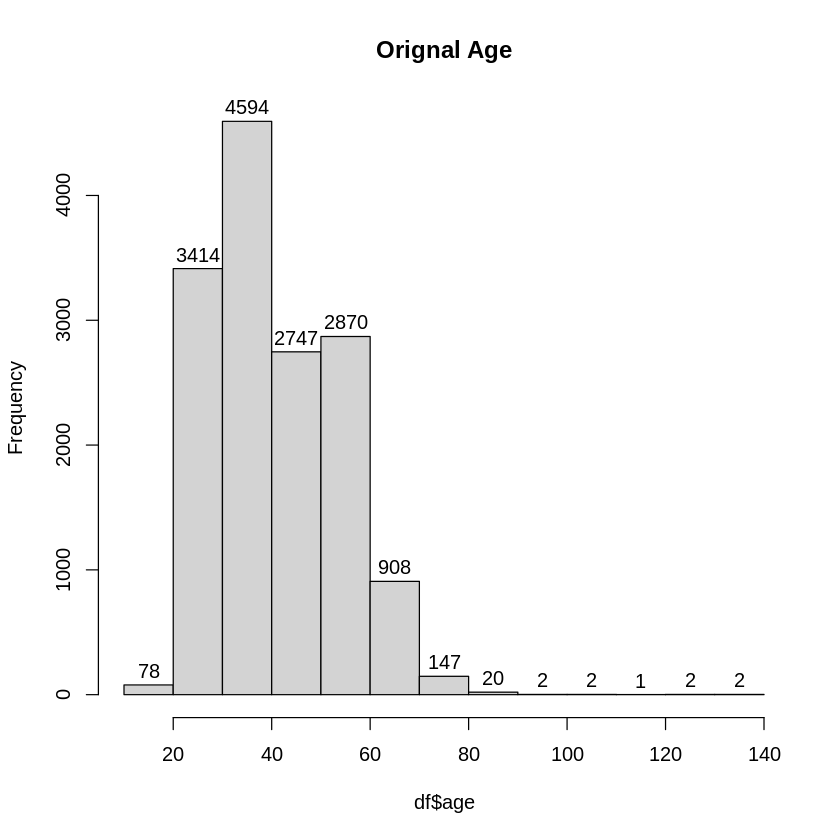

In [ ]:
# Trip Duration
hist(filter_df$tripduration, labels = TRUE, main = "Tripduration after removing outliers")
hist(df$tripduration, labels = TRUE, main = "Orignal Tripduration")

# Age
hist(filter_df$age, labels = TRUE, main = "Age after removing outliers")
hist(df$age, labels = TRUE, main = "Orignal Age")

In [ ]:
# install.packages("maps")
# install.packages("mapdata")
library(maps)
library(mapdata)

ERROR: ignored

In [ ]:
width = 0.1
map("state", "New York", xlim = c(-73.935242 - width, -73.935242 + width), ylim = c(40.730610 - width, 40.730610 + width))
points(start.station.latitude ~ start.station.longitude, data = filter_df,
       pch = 20, col = rgb(red = 1, green = 0, blue = 0, alpha = 0.01))
points(end.station.latitude ~ end.station.longitude, data = filter_df, 
       pch = 20, col = rgb(red = 0, green = 0, blue = 1, alpha = 0.01))

ERROR: ignored

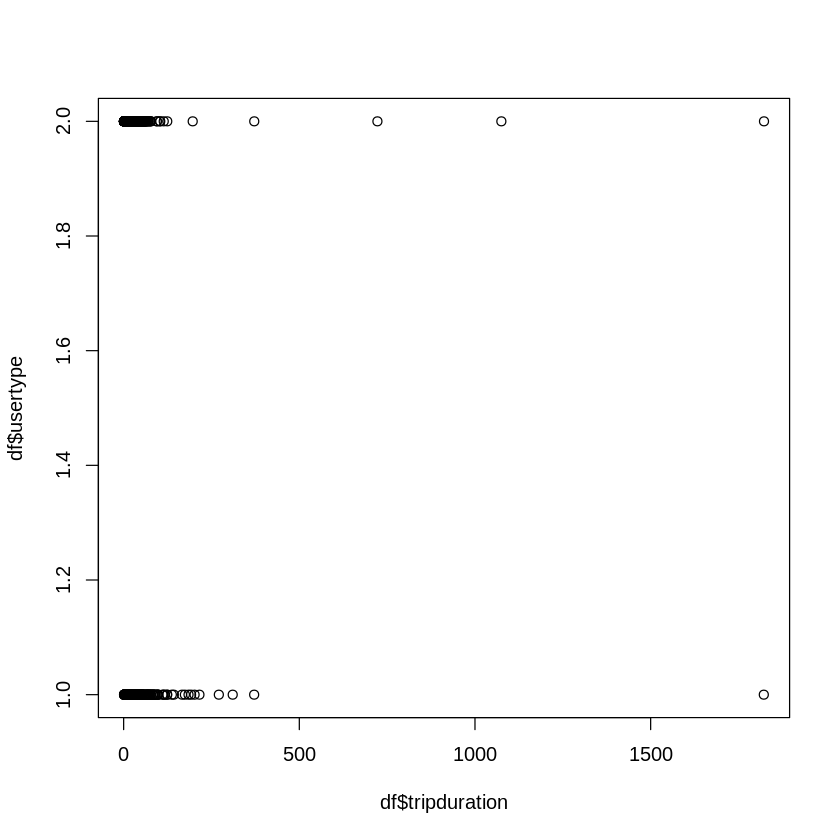

In [ ]:
plot(df$tripduration, df$usertype)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’




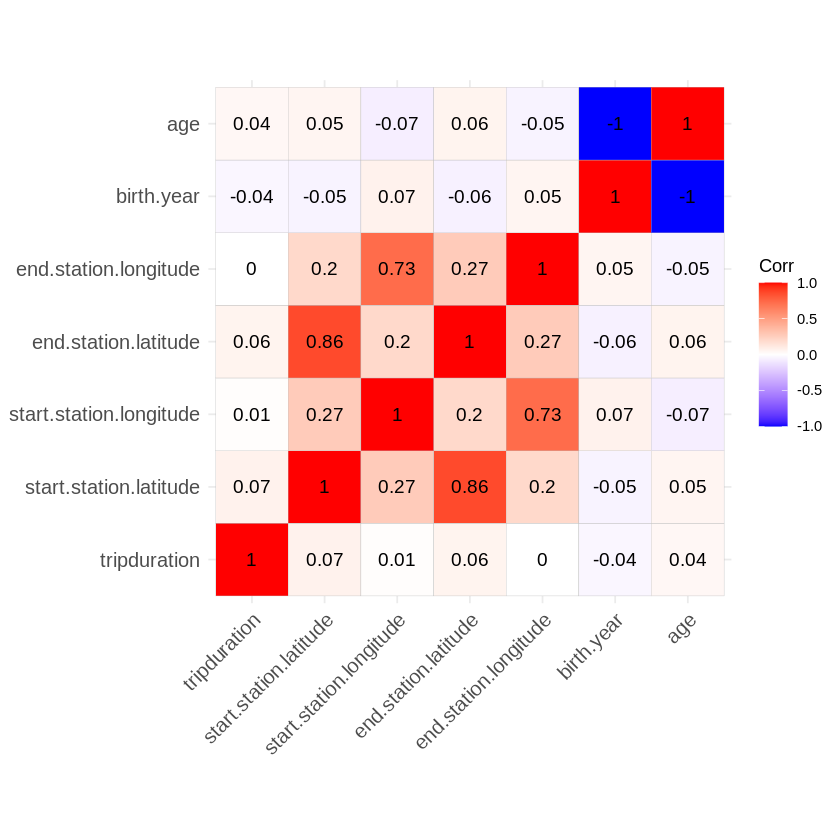

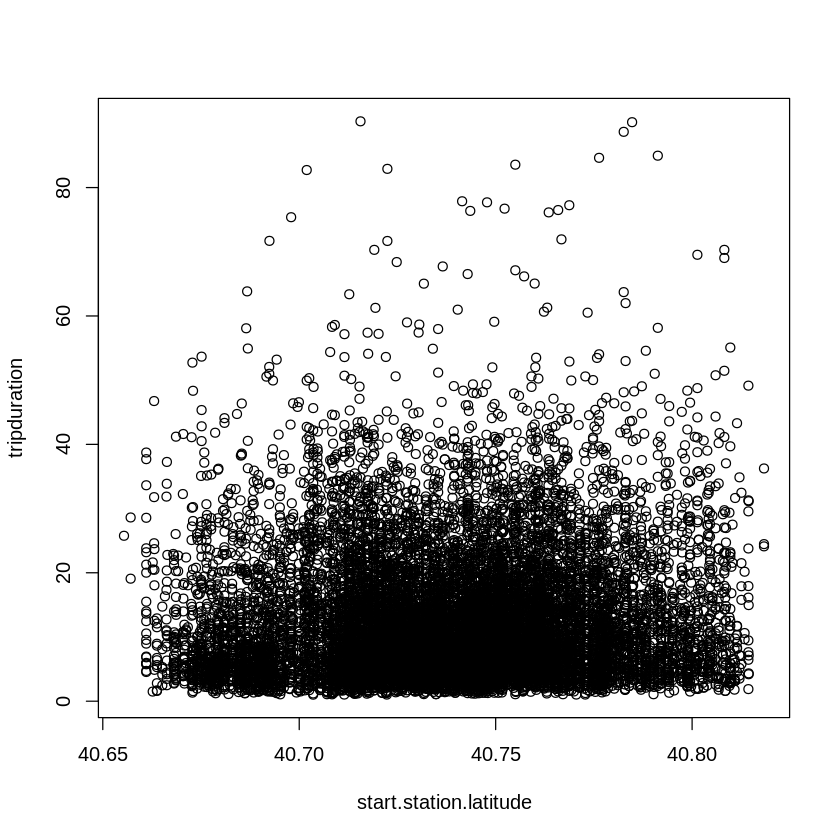

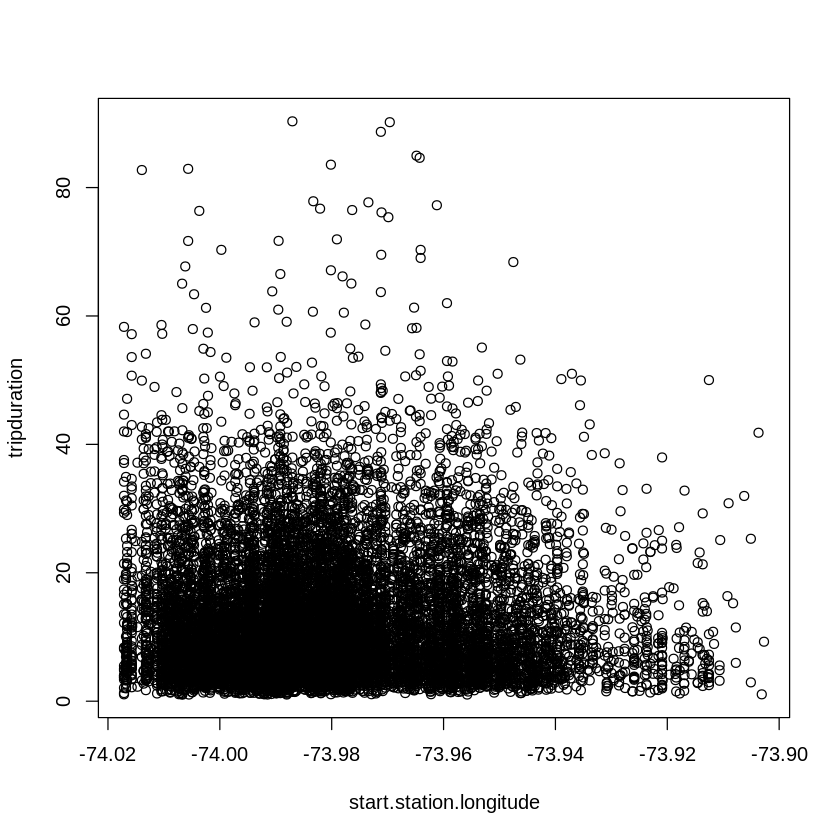

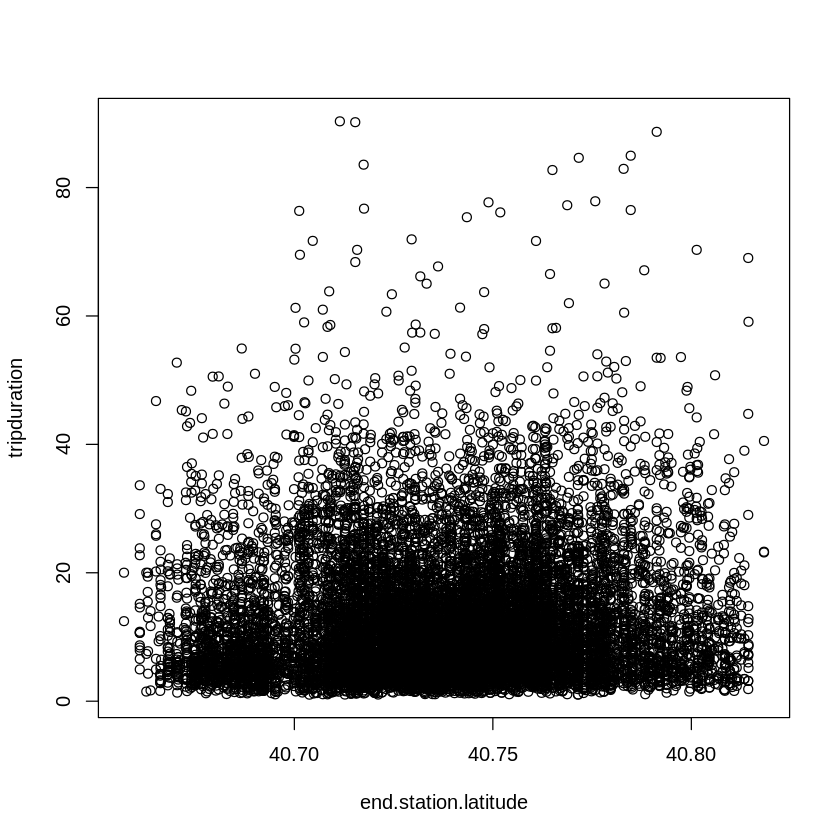

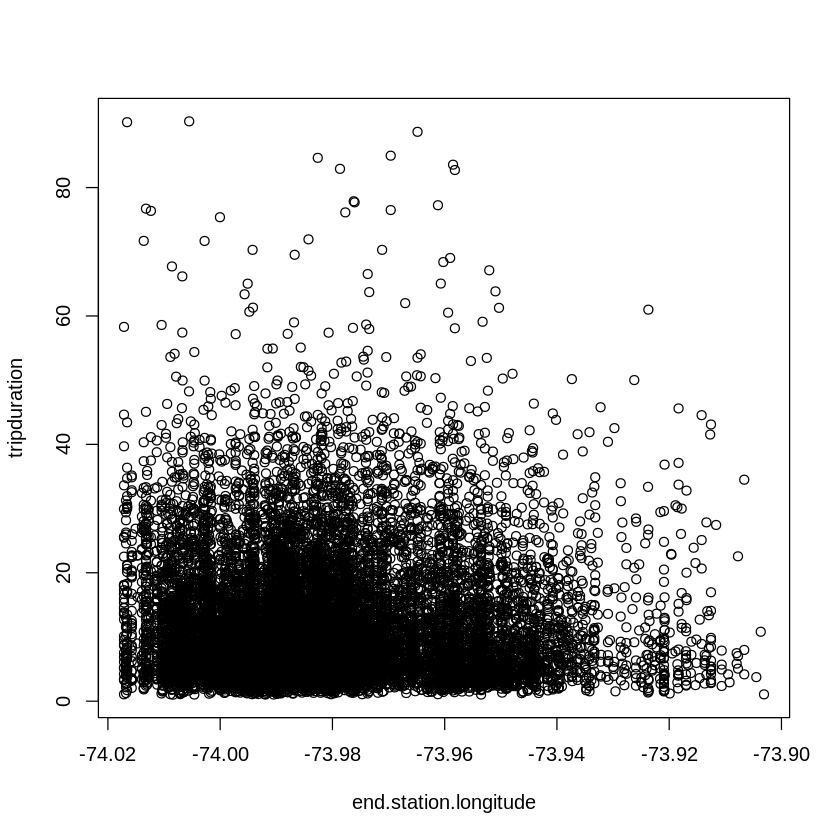

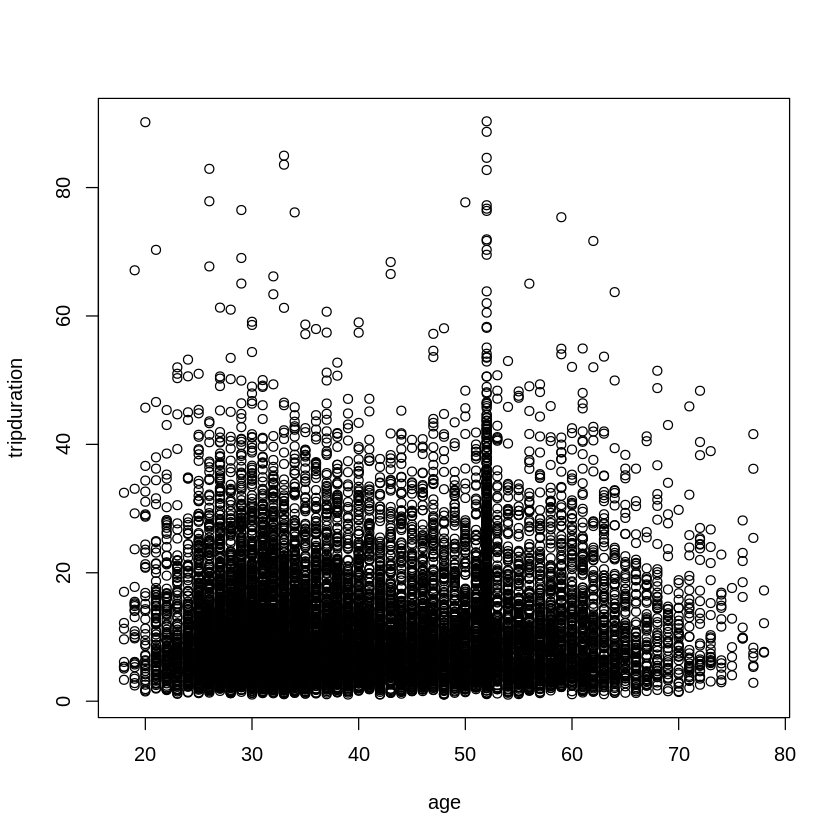

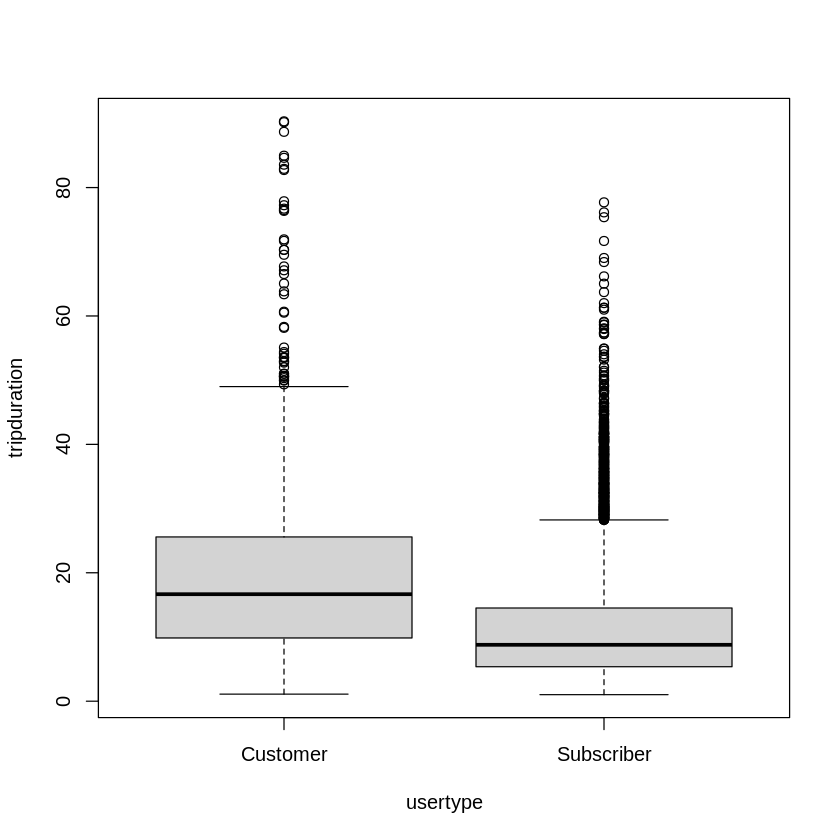

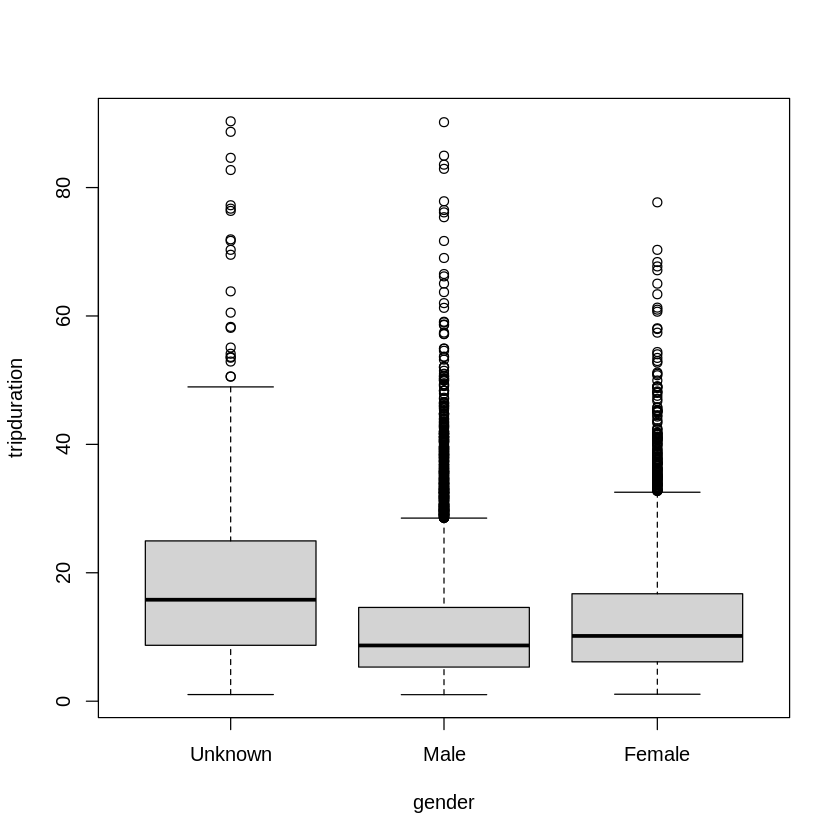

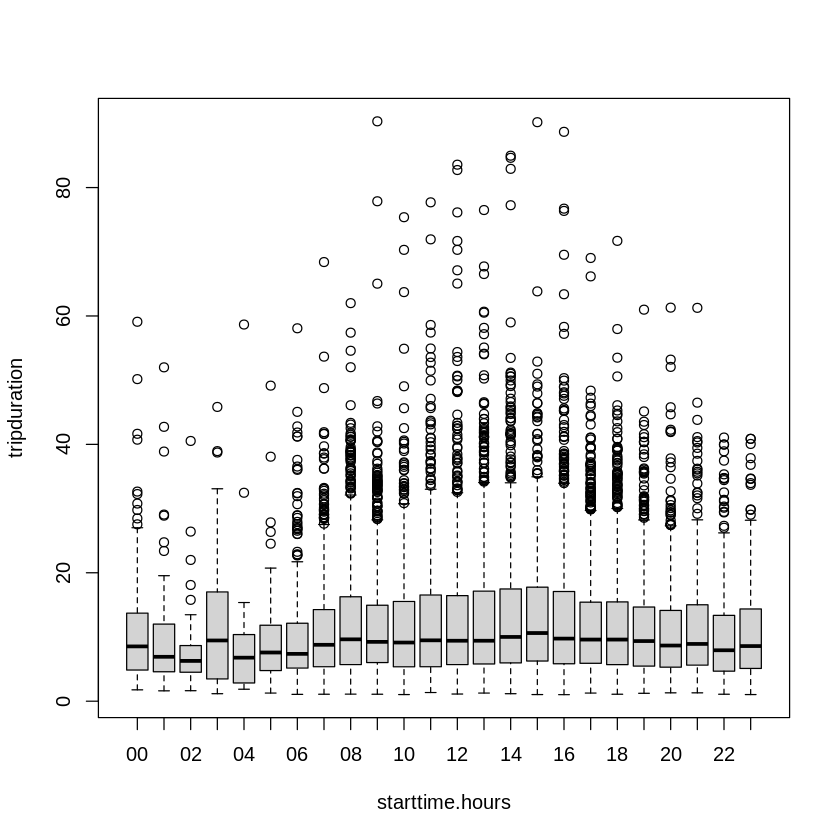

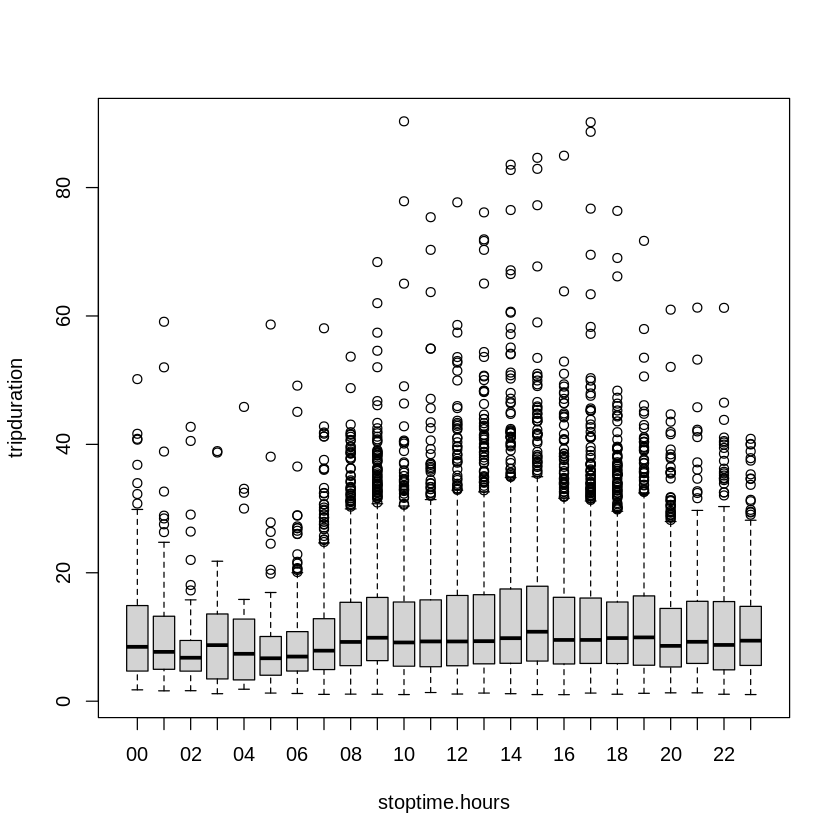

In [ ]:
#Praneetha
install.packages("ggcorrplot")
# install.packages("ggplot2")
# install.packages("dplyr")
library(ggcorrplot)
library(ggplot2)
library(dplyr)

# correlation matrix for continuous variables 
numeric_subset <- filter_df[, c("tripduration", "start.station.latitude",
                                "start.station.longitude", "end.station.latitude",
                                "end.station.longitude", "birth.year","age")]
corr <- round(cor(numeric_subset,use="complete.obs"),digits=2)
ggcorrplot(corr, lab=TRUE)

plot(tripduration ~ start.station.latitude, data = filter_df)
plot(tripduration ~ start.station.longitude, data = filter_df)
plot(tripduration ~ end.station.latitude, data = filter_df)
plot(tripduration ~ end.station.longitude, data = filter_df)
plot(tripduration ~ age, data = filter_df)
plot(tripduration ~ usertype, data = filter_df)
plot(tripduration ~ gender, data = filter_df)
plot(tripduration ~ starttime.hours, data = filter_df)
plot(tripduration ~ stoptime.hours, data = filter_df)


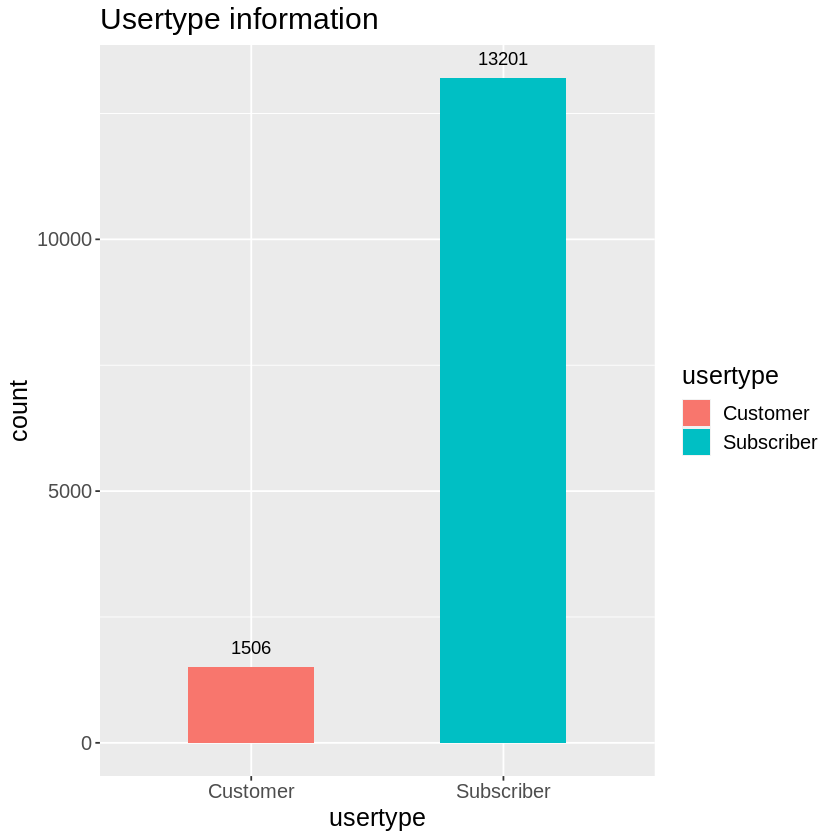

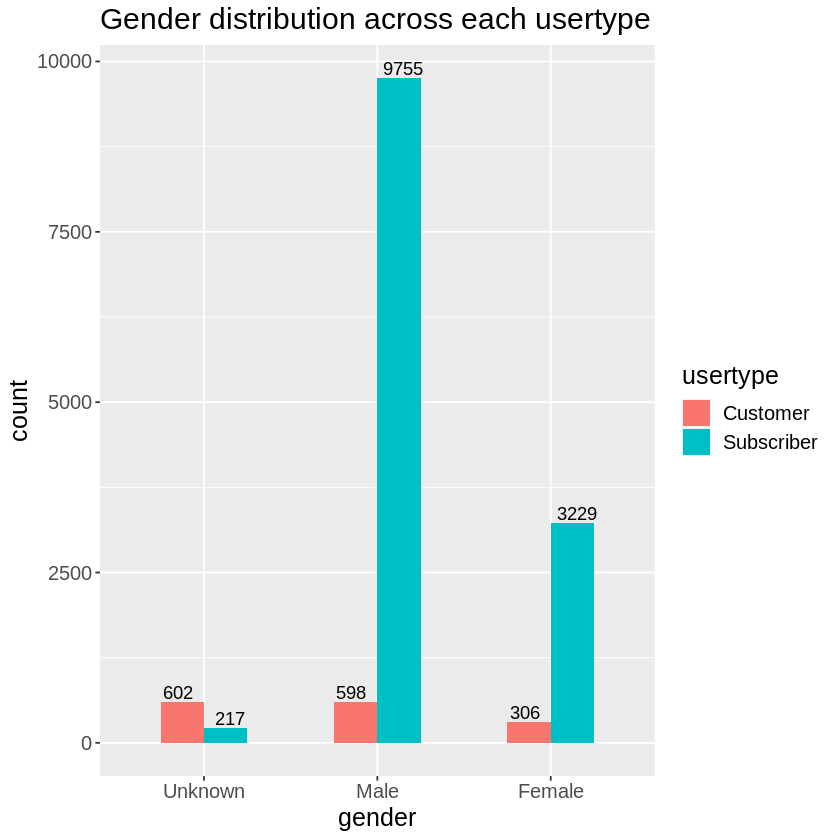

In [ ]:
# user type and its counts
ggplot(data=filter_df, aes(x=usertype, fill=usertype)) +
  geom_bar(width = 0.5) + theme(text = element_text(size=15)) + 
  labs(title = "Usertype information") + geom_text(stat = 'count', aes(label=..count..), vjust=-1)
# bar chart for user type
ggplot(data=filter_df, aes(x=gender, fill=usertype)) +
  geom_bar(width = 0.5, position="dodge") + theme(text = element_text(size=15)) + 
  labs(title = "Gender distribution across each usertype") + geom_text(stat = 'count', aes(label=..count..), position=position_dodge(width=0.6), vjust=-0.25)

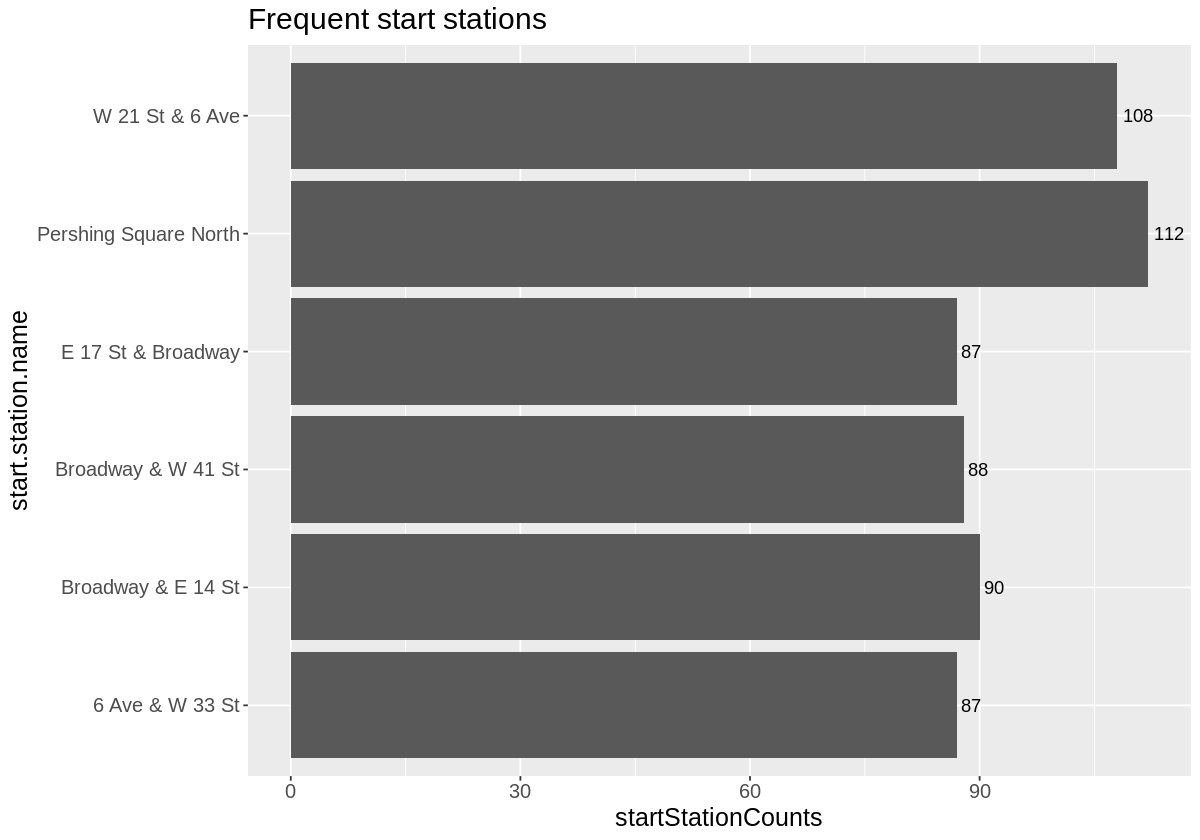

In [ ]:
# top frequent start station names and its frequency
 group_by_start_station_data <- filter_df%>%group_by(start.station.name)%>%summarize(startStationCounts=n())%>% arrange(desc(startStationCounts))
 top_start_stations <- head(group_by_start_station_data)
 options(repr.plot.width = 10,repr.plot.length = 10)
 ggplot(data=top_start_stations, aes(x=start.station.name, y=startStationCounts)) + theme(text = element_text(size=15)) +
   geom_bar(stat = "identity") + coord_flip() + geom_text(aes(label = startStationCounts), hjust = -.2) + labs(title = "Frequent start stations")

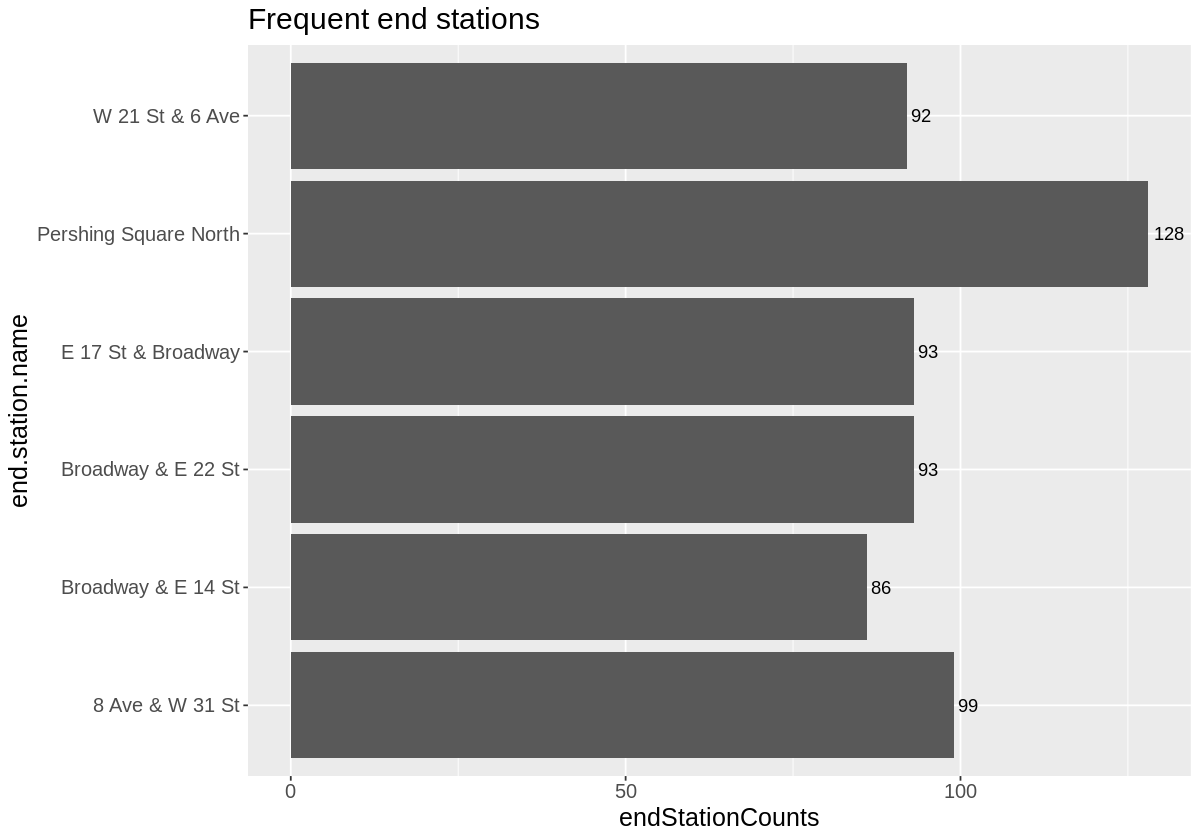

In [ ]:
 # top frequent stop station names and its frequency
 group_by_end_station_data<-filter_df%>%group_by(end.station.name)%>%summarize(endStationCounts=n())%>%arrange(desc(endStationCounts))
 top_end_stations <- head(group_by_end_station_data)
 options(repr.plot.width = 10,repr.plot.length = 10)
 ggplot(data=top_end_stations, aes(x=end.station.name, y=endStationCounts)) + theme(text = element_text(size=15)) +
   geom_bar(stat = "identity")+coord_flip() + labs(title = "Frequent end stations") + geom_text(aes(label = endStationCounts), 
                                         hjust = -.2)

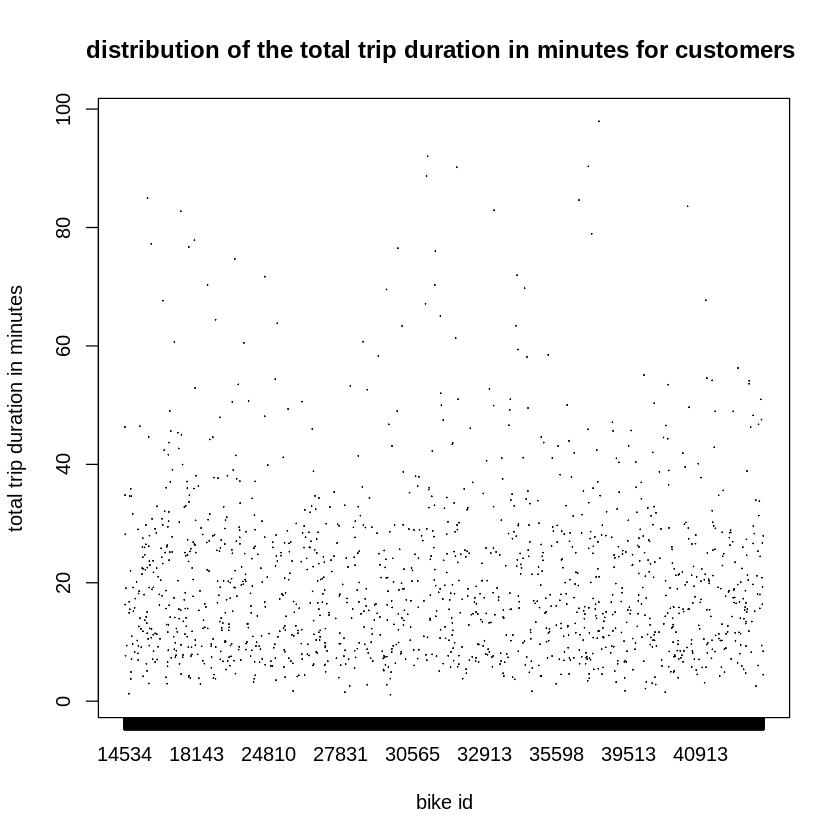

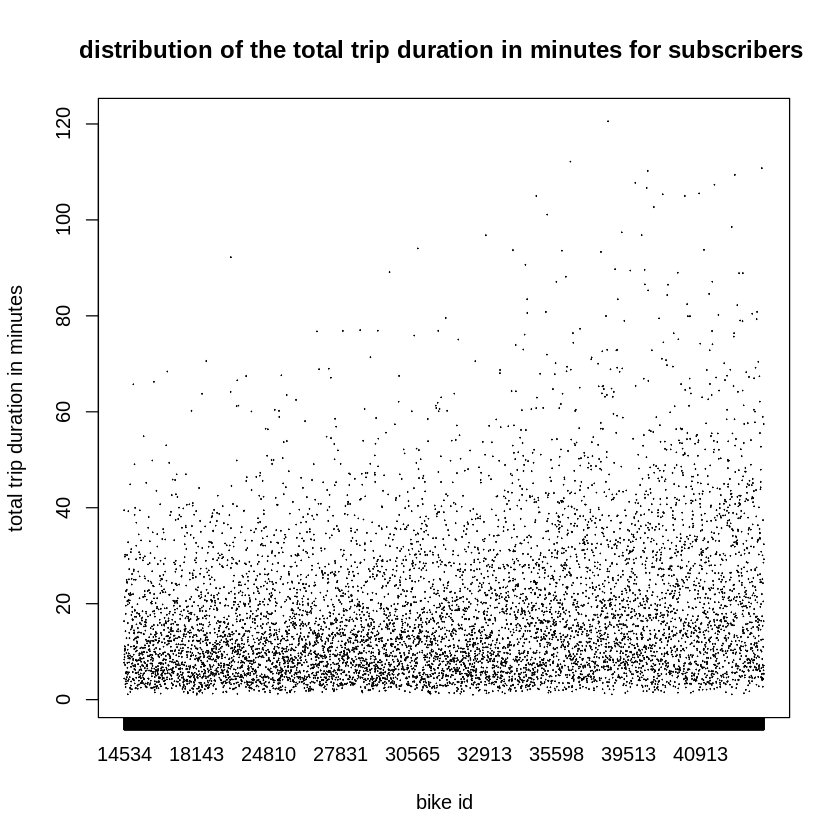

In [ ]:
#distribution of the total trip duration in minutes for customers
customers_trip_durations <- filter_df%>%filter(grepl("Customer", usertype)) %>% group_by(bikeid) %>% mutate(total_time = sum(tripduration, na.rm = T))
plot(total_time ~ bikeid, data=customers_trip_durations, xlab="bike id", ylab="total trip duration in minutes", main="distribution of the total trip duration in minutes for customers ")

#distribution of the total trip duration in minutes for subscribers
subscribers_trip_durations <- filter_df%>% filter(grepl("Subscriber", usertype))%>%group_by(bikeid)%>%summarize(total_time = sum(tripduration, na.rm = T))
plot(total_time ~ bikeid, data=subscribers_trip_durations, xlab="bike id", ylab="total trip duration in minutes", main="distribution of the total trip duration in minutes for subscribers ")

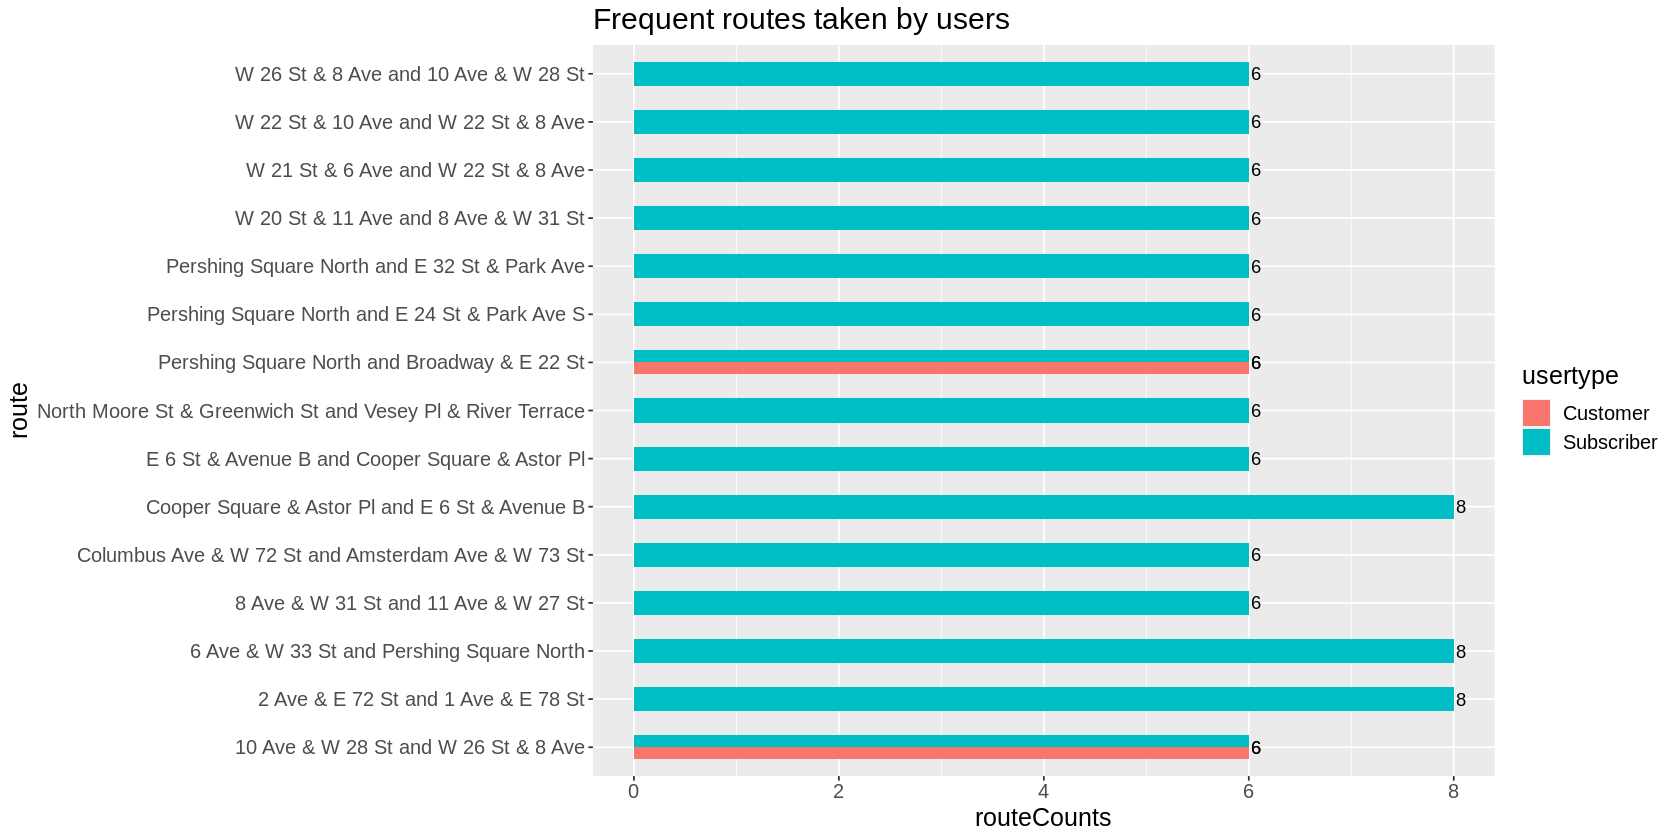

In [ ]:
#most frequent routes taken by the users
frequent_routes <- filter_df%>% group_by(start.station.id, end.station.id)%>%mutate(routeCounts=n())%>%arrange(desc(routeCounts))
frequent_routes.subset <- distinct(frequent_routes[,c("start.station.name", "end.station.name", "routeCounts","usertype")])
frequent_routes.subset$route <-  paste(frequent_routes.subset$start.station.name, frequent_routes.subset$end.station.name, sep = " and ")
top_frequent_routes <- frequent_routes.subset%>%top_n(frequent_routes.subset$routeCounts, n=5)
options(repr.plot.width = 14,repr.plot.length = 14)
ggplot(data=top_frequent_routes, aes(x=route, y=routeCounts, fill=usertype)) + labs(title = "Frequent routes taken by users") + 
  geom_bar(stat = "identity", position = "dodge", width = 0.5) + theme(text = element_text(size=15)) + coord_flip()+ geom_text(aes(label = routeCounts), 
                                         hjust = -.2)



`summarise()` has grouped output by 'start.station.name'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'start.station.name'. You can override using the `.groups` argument.



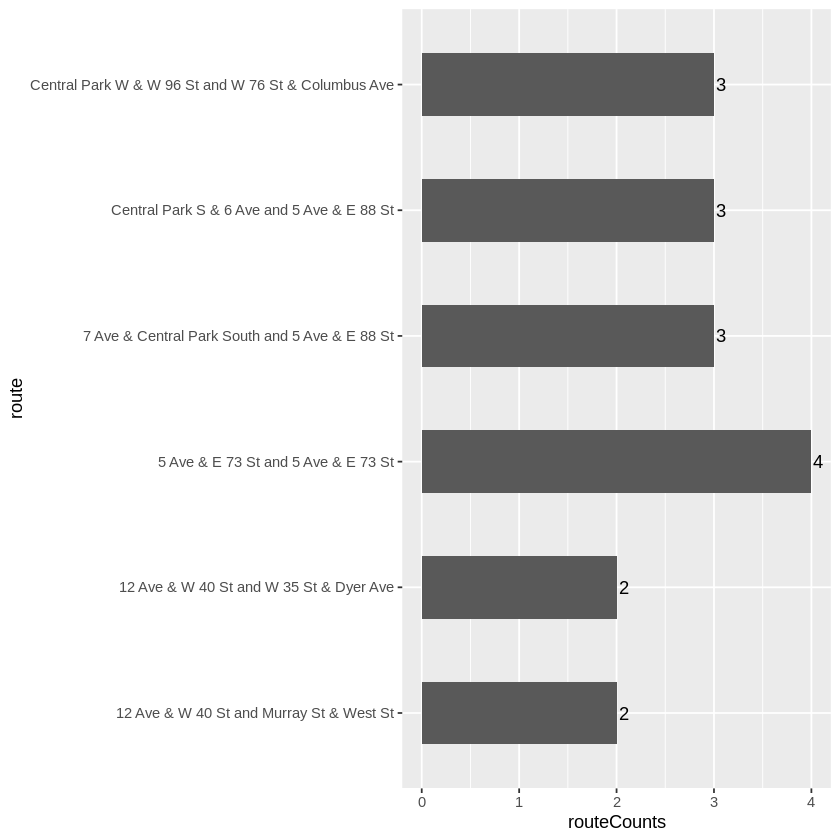

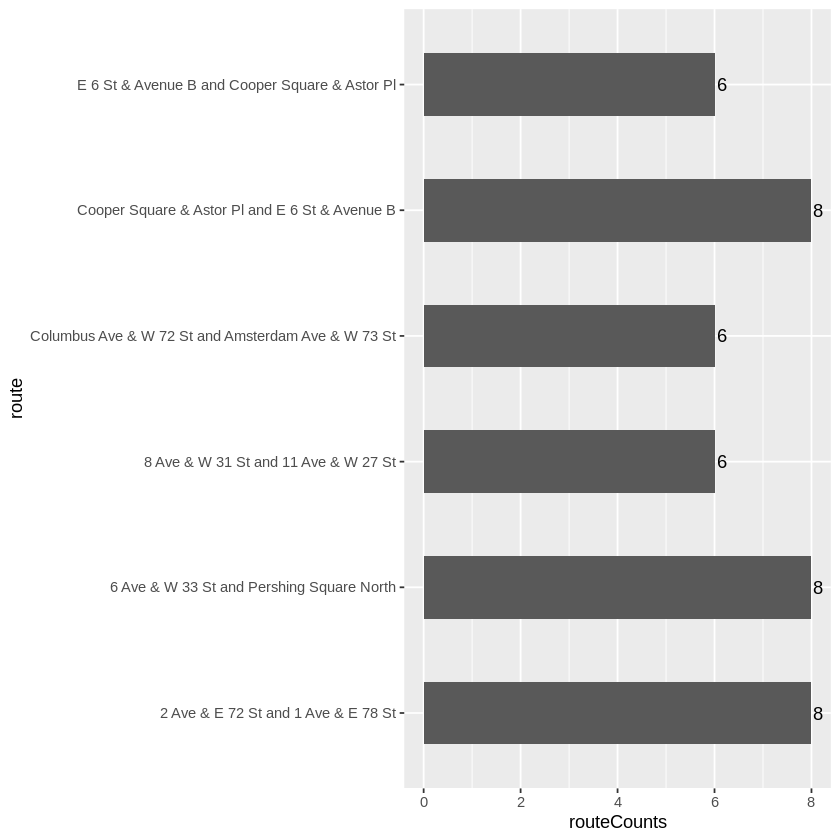

In [ ]:
#top frequent routes used by the customers
frequent_customer_routes <- filter_df%>%filter(grepl("Customer", usertype))%>% group_by(start.station.name, end.station.name)%>%summarise(routeCounts=n())%>%arrange(desc(routeCounts))%>% distinct()
frequent_customer_routes$route <-  paste(frequent_customer_routes$start.station.name, frequent_customer_routes$end.station.name, sep = " and ")
top_frequent_customer_routes <- head(frequent_customer_routes)
ggplot(data=top_frequent_customer_routes, aes(x=route, y=routeCounts)) +
  geom_bar(stat = "identity", width = 0.5) + coord_flip()+ geom_text(aes(label = routeCounts), 
                                         hjust = -.2)

#top frequent routes by the subscribers
frequent_subscriber_routes <- filter_df%>%filter(grepl("Subscriber", usertype))%>% group_by(start.station.name, end.station.name)%>%summarise(routeCounts=n())%>%arrange(desc(routeCounts))%>% distinct()
frequent_subscriber_routes$route <-  paste(frequent_subscriber_routes$start.station.name, frequent_subscriber_routes$end.station.name, sep = " and ")
top_frequent_subscriber_routes <- head(frequent_subscriber_routes)
ggplot(data=top_frequent_subscriber_routes, aes(x=route, y=routeCounts)) +
  geom_bar(stat = "identity", width = 0.5) + coord_flip()+ geom_text(aes(label = routeCounts), 
                                         hjust = -.2)

In [ ]:
head(filter_df)

,tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender,age,starttime.hours,stoptime.hours
,<dbl>,<dttm>,<dttm>,<fct>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>
1,23.600000,2019-11-29 19:03:50,2019-11-29 19:27:27,486,Broadway & W 29 St,40.74620,-73.98856,79,Franklin St & W Broadway,40.71912,-74.00667,17790,Customer,2001,Male,20,19,19
2,4.783333,2019-11-27 07:09:03,2019-11-27 07:13:51,460,S 4 St & Wythe Ave,40.71286,-73.96590,3093,N 6 St & Bedford Ave,40.71745,-73.95851,38435,Subscriber,1983,Unknown,38,07,07
3,9.883333,2019-11-18 22:36:08,2019-11-18 22:46:02,447,8 Ave & W 52 St,40.76371,-73.98516,468,Broadway & W 56 St,40.76527,-73.98192,40482,Subscriber,1993,Male,28,22,22
4,13.766667,2019-11-06 11:44:07,2019-11-06 11:57:54,3129,Queens Plaza North & Crescent St,40.75110,-73.94074,522,E 51 St & Lexington Ave,40.75715,-73.97208,34086,Subscriber,1982,Male,39,11,11
5,15.500000,2019-11-14 06:18:31,2019-11-14 06:34:02,3737,Stanton St & Norfolk St,40.72075,-73.98627,518,E 39 St & 2 Ave,40.74780,-73.97344,27634,Subscriber,1986,Male,35,06,06
6,11.500000,2019-11-15 16:19:03,2019-11-15 16:30:34,3323,W 106 St & Central Park West,40.79819,-73.96059,3552,W 113 St & Broadway,40.80597,-73.96493,32642,Subscriber,1997,Male,24,16,16


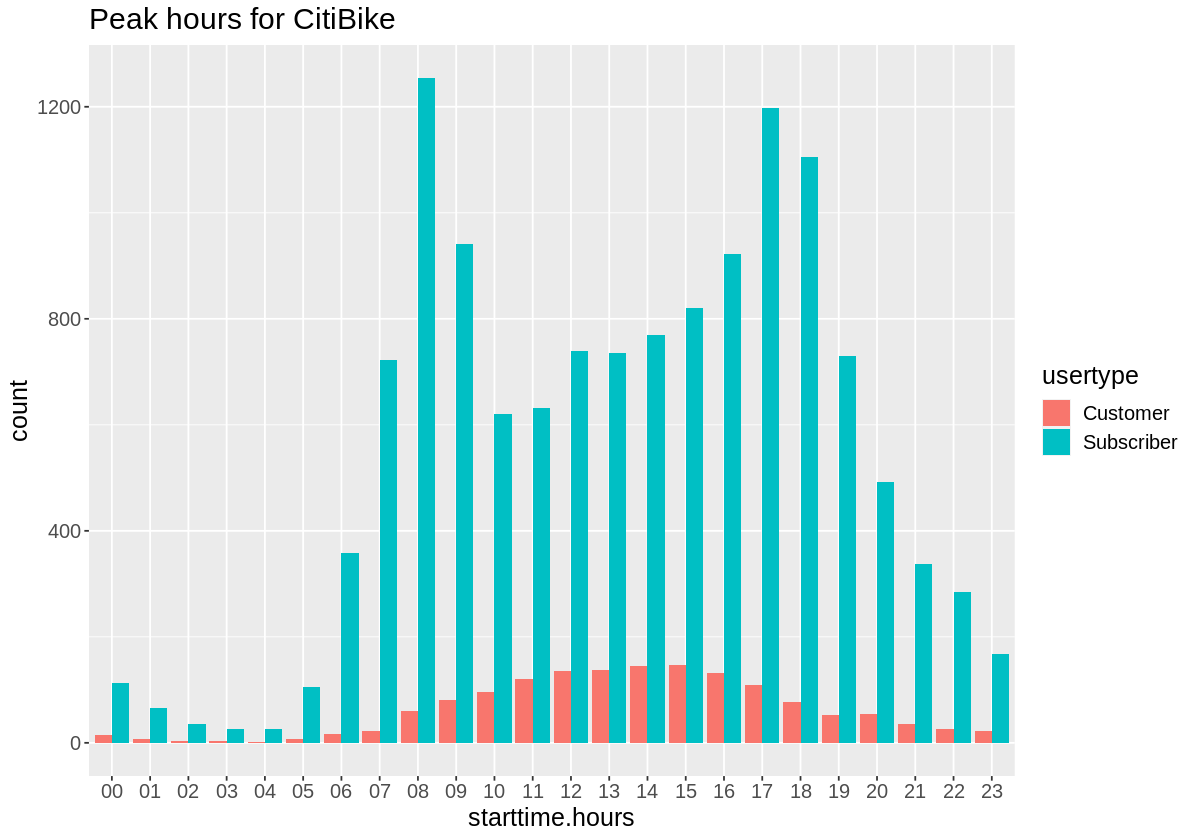

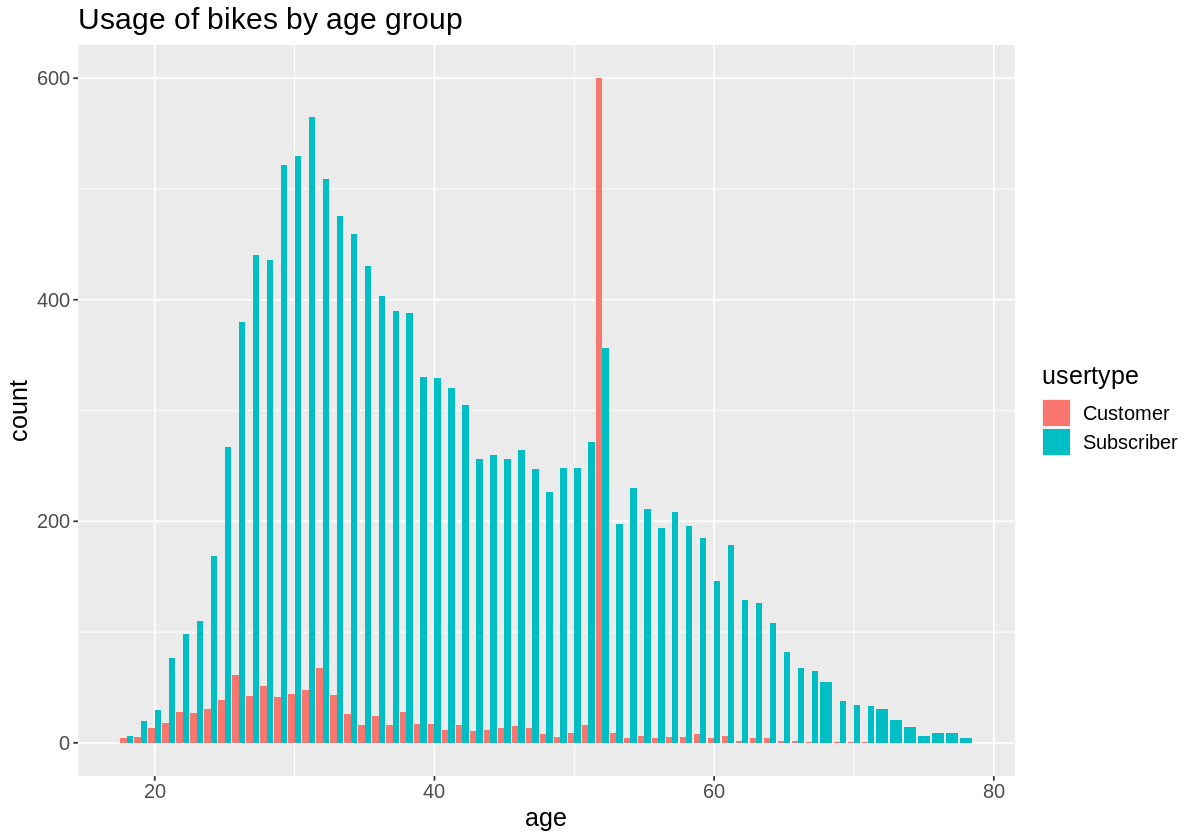

In [ ]:
#peak hours of a day
filter_df %>% 
  ggplot(aes(x = starttime.hours, fill=usertype)) + theme(text = element_text(size=15)) + labs(title = "Peak hours for CitiBike") +
  geom_bar(position = "dodge")


#usage of bikes by age group
  filter_df %>% group_by(bikeid) %>%
  ggplot(aes(x = age, fill=usertype)) + theme(text = element_text(size=15)) + labs(title = "Usage of bikes by age group") +
  geom_bar(position = "dodge")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



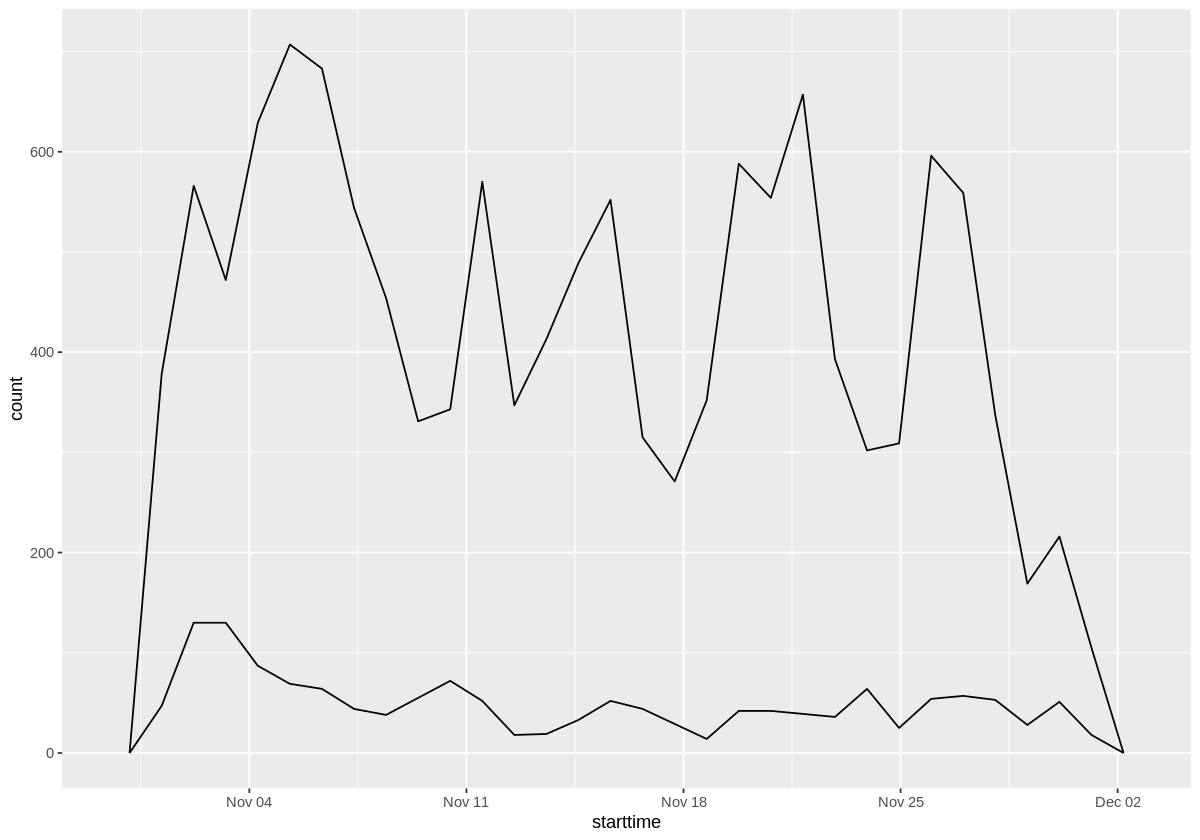

In [ ]:
#frequency plot of the start time in the november month w.r.t user type
ggplot(data=filter_df, aes(x=starttime, fill=usertype)) +
  geom_freqpoly()

In [ ]:
# Preidictive: Linear Model
reg1 <- lm(tripduration ~ start.station.latitude + end.station.latitude + usertype + gender + age + starttime.hours + stoptime.hours + start.station.id + end.station.id, data = filter_df)
summary(reg1)
reg2 <- lm(tripduration ~ start.station.latitude + end.station.latitude + usertype + gender + age + starttime.hours + stoptime.hours, data = filter_df)
summary(reg2)
reg3 <- lm(log(tripduration) ~ start.station.latitude + end.station.latitude + usertype + gender + age + starttime.hours + stoptime.hours, data = filter_df)
summary(reg3)



Call:
lm(formula = tripduration ~ start.station.latitude + end.station.latitude + 
    usertype + gender + age + starttime.hours + stoptime.hours + 
    start.station.id + end.station.id, data = filter_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.969  -4.715  -1.175   3.289  62.770 

Coefficients: (9 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             2.739e+03  7.694e+03   0.356 0.721823    
start.station.latitude  1.197e+02  1.338e+02   0.895 0.371061    
end.station.latitude   -1.864e+02  1.332e+02  -1.399 0.161843    
usertypeSubscriber     -5.512e+00  2.845e-01 -19.374  < 2e-16 ***
genderMale             -1.319e+00  3.769e-01  -3.499 0.000468 ***
genderFemale            4.249e-02  3.927e-01   0.108 0.913843    
age                     1.952e-02  6.167e-03   3.166 0.001552 ** 
starttime.hours01      -6.501e+00  2.152e+00  -3.021 0.002522 ** 
starttime.hours02      -1.500e+01  4.186e+00  -3.


Call:
lm(formula = tripduration ~ start.station.latitude + end.station.latitude + 
    usertype + gender + age + starttime.hours + stoptime.hours, 
    data = filter_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.913  -5.335  -1.982   3.411  66.194 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -8.222e+02  9.927e+01  -8.283  < 2e-16 ***
start.station.latitude  1.628e+01  4.499e+00   3.619 0.000297 ***
end.station.latitude    4.309e+00  4.569e+00   0.943 0.345679    
usertypeSubscriber     -6.116e+00  2.719e-01 -22.488  < 2e-16 ***
genderMale             -1.661e+00  3.645e-01  -4.557 5.23e-06 ***
genderFemale           -4.018e-01  3.800e-01  -1.057 0.290388    
age                     2.249e-02  5.937e-03   3.788 0.000152 ***
starttime.hours01      -6.251e+00  2.087e+00  -2.996 0.002744 ** 
starttime.hours02      -1.556e+01  4.046e+00  -3.847 0.000120 ***
starttime.hours03       1.813e+02  7.100e+00  25.530  < 2e-1


Call:
lm(formula = log(tripduration) ~ start.station.latitude + end.station.latitude + 
    usertype + gender + age + starttime.hours + stoptime.hours, 
    data = filter_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.47685 -0.45384  0.00945  0.47182  2.07696 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -8.145e+01  7.830e+00 -10.402  < 2e-16 ***
start.station.latitude  1.481e+00  3.549e-01   4.172 3.04e-05 ***
end.station.latitude    5.809e-01  3.604e-01   1.612 0.107057    
usertypeSubscriber     -4.567e-01  2.145e-02 -21.291  < 2e-16 ***
genderMale             -1.051e-01  2.875e-02  -3.654 0.000259 ***
genderFemale            1.771e-02  2.998e-02   0.591 0.554637    
age                     1.333e-03  4.684e-04   2.846 0.004431 ** 
starttime.hours01      -5.152e-01  1.646e-01  -3.130 0.001752 ** 
starttime.hours02      -1.219e+00  3.191e-01  -3.818 0.000135 ***
starttime.hours03       1.226e+01  5.601e-01 

In [ ]:
#stepwise regression model
intercept_only <- lm(tripduration ~ 1, data = filter_df)
my.formula <- formula(tripduration ~ start.station.latitude + end.station.latitude + usertype + gender + age + starttime.hours + stoptime.hours)

both <- step(intercept_only,direction='both',scope=my.formula,trace=1)

summary(both)

forward <- step(intercept_only,direction='forward',scope=my.formula,trace=1)

summary(forward)

backward <- step(intercept_only,direction='backward',scope=my.formula,trace=1)

summary(backward)



Start:  AIC=66276.47
tripduration ~ 1

                         Df Sum of Sq     RSS   AIC
+ usertype                1     88974 1243303 65262
+ gender                  2     41481 1290796 65815
+ stoptime.hours         23     14180 1318097 66165
+ starttime.hours        23     11717 1320560 66193
+ start.station.latitude  1      5752 1326525 66215
+ end.station.latitude    1      4907 1327370 66224
+ age                     1      2503 1329774 66251
<none>                                1332277 66276

Step:  AIC=65261.95
tripduration ~ usertype

                         Df Sum of Sq     RSS   AIC
+ gender                  2      6127 1237176 65193
+ stoptime.hours         23      9236 1234067 65198
+ start.station.latitude  1      5402 1237901 65200
+ end.station.latitude    1      4708 1238595 65208
+ starttime.hours        23      7089 1236214 65224
+ age                     1      2228 1241075 65238
<none>                                1243303 65262
- usertype                1    


Call:
lm(formula = tripduration ~ usertype + gender + start.station.latitude + 
    stoptime.hours + starttime.hours + age, data = filter_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.860  -5.338  -1.987   3.415  66.161 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -7.946e+02  9.485e+01  -8.378  < 2e-16 ***
usertypeSubscriber     -6.114e+00  2.719e-01 -22.483  < 2e-16 ***
genderMale             -1.660e+00  3.645e-01  -4.555 5.28e-06 ***
genderFemale           -4.052e-01  3.800e-01  -1.066 0.286339    
start.station.latitude  1.991e+01  2.328e+00   8.552  < 2e-16 ***
stoptime.hours01        5.224e+00  1.986e+00   2.631 0.008527 ** 
stoptime.hours02        1.348e+01  3.907e+00   3.451 0.000560 ***
stoptime.hours03       -1.812e+02  7.278e+00 -24.895  < 2e-16 ***
stoptime.hours04       -1.720e+02  6.386e+00 -26.924  < 2e-16 ***
stoptime.hours05       -1.608e+02  4.463e+00 -36.025  < 2e-16 ***
stoptime.hours06      

Start:  AIC=66276.47
tripduration ~ 1

                         Df Sum of Sq     RSS   AIC
+ usertype                1     88974 1243303 65262
+ gender                  2     41481 1290796 65815
+ stoptime.hours         23     14180 1318097 66165
+ starttime.hours        23     11717 1320560 66193
+ start.station.latitude  1      5752 1326525 66215
+ end.station.latitude    1      4907 1327370 66224
+ age                     1      2503 1329774 66251
<none>                                1332277 66276

Step:  AIC=65261.95
tripduration ~ usertype

                         Df Sum of Sq     RSS   AIC
+ gender                  2    6127.2 1237176 65193
+ stoptime.hours         23    9235.7 1234067 65198
+ start.station.latitude  1    5401.6 1237901 65200
+ end.station.latitude    1    4707.7 1238595 65208
+ starttime.hours        23    7088.6 1236214 65224
+ age                     1    2228.2 1241075 65238
<none>                                1243303 65262

Step:  AIC=65193.29
tripdurati


Call:
lm(formula = tripduration ~ usertype + gender + start.station.latitude + 
    stoptime.hours + starttime.hours + age, data = filter_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.860  -5.338  -1.987   3.415  66.161 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -7.946e+02  9.485e+01  -8.378  < 2e-16 ***
usertypeSubscriber     -6.114e+00  2.719e-01 -22.483  < 2e-16 ***
genderMale             -1.660e+00  3.645e-01  -4.555 5.28e-06 ***
genderFemale           -4.052e-01  3.800e-01  -1.066 0.286339    
start.station.latitude  1.991e+01  2.328e+00   8.552  < 2e-16 ***
stoptime.hours01        5.224e+00  1.986e+00   2.631 0.008527 ** 
stoptime.hours02        1.348e+01  3.907e+00   3.451 0.000560 ***
stoptime.hours03       -1.812e+02  7.278e+00 -24.895  < 2e-16 ***
stoptime.hours04       -1.720e+02  6.386e+00 -26.924  < 2e-16 ***
stoptime.hours05       -1.608e+02  4.463e+00 -36.025  < 2e-16 ***
stoptime.hours06      

Start:  AIC=66276.47
tripduration ~ 1




Call:
lm(formula = tripduration ~ 1, data = filter_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.179  -6.579  -2.862   3.554  78.121 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.19583    0.07849   155.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.518 on 14706 degrees of freedom


[1] 0.006309573

8 x 1 sparse Matrix of class "dgCMatrix"
                                  s0
(Intercept)            -808.09164308
start.station.latitude   15.11597576
end.station.latitude      5.31066405
usertype                 -8.13610414
gender                    0.64830640
age                       0.03377983
starttime.hours          -1.18624885
stoptime.hours            1.22660102

[1] 0.090253

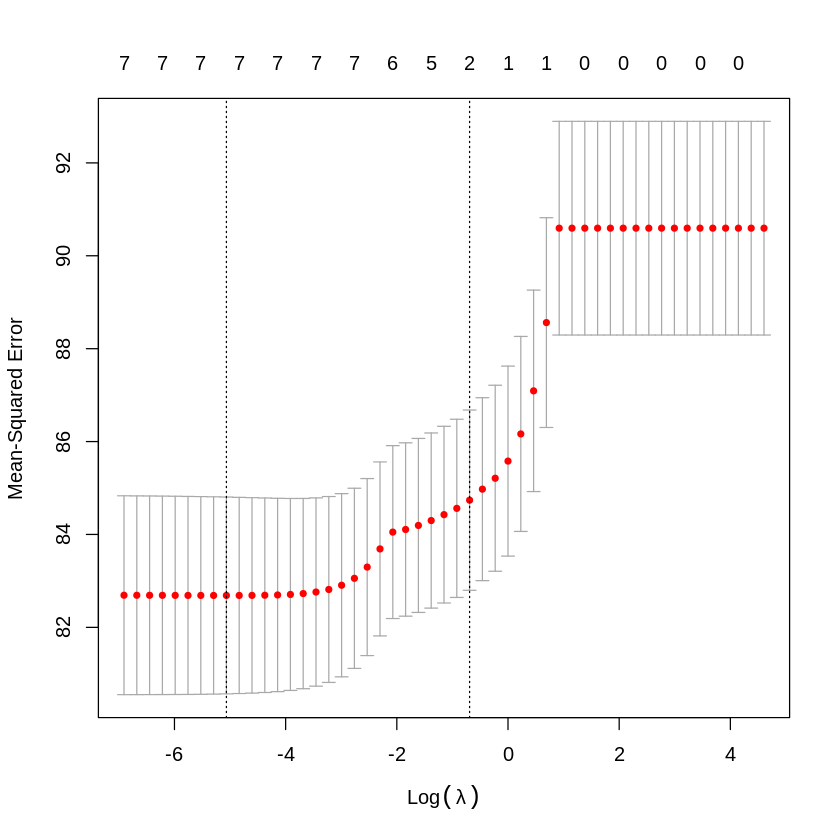

In [ ]:
# Lasso Model
#install.packages('glmnet')
library("glmnet")
Y <- filter_df$tripduration 
X <- data.matrix(filter_df[,c('start.station.latitude', 'end.station.latitude',
                              'usertype', 'gender', 'age', 'starttime.hours',
                              'stoptime.hours')])
library(glmnet)
lambdas <- 10^seq(2, -3, by = -.1)
cv_model <- cv.glmnet(X,Y, alpha = 1, lambda = lambdas)

best_lambda <- cv_model$lambda.min
best_lambda

plot(cv_model)

best_model <- glmnet(X, Y, alpha = 1, lambda = best_lambda)
coef(best_model)

#use fitted best model to make predictions
y_predicted <- predict(best_model, s = best_lambda, newx = X)

#find SST and SSE
sst <- sum((Y - mean(Y))^2)
sse <- sum((y_predicted - Y)^2)

#find R-Squared
rsq <- 1 - sse/sst
rsq





In [ ]:
# Ridge Model: Same as lasso, but alpha need to be "0".

Y <- filter_df$tripduration 
X <- data.matrix(filter_df[,c('start.station.latitude', 'end.station.latitude',
                              'usertype', 'gender', 'age', 'starttime.hours',
                              'stoptime.hours')])
library(glmnet)
ridgemodel <- cv.glmnet(X,Y, alpha = 0)
best_lambda <- ridgemodel$lambda.min

best_model <- glmnet(X, Y, alpha = 1, lambda = best_lambda)
coef(best_model)

#use fitted best model to make predictions
y_predicted <- predict(best_model, s = best_lambda, newx = X)

#find SST and SSE
sst <- sum((Y - mean(Y))^2)
sse <- sum((y_predicted - Y)^2)

#find R-Squared
rsq <- 1 - sse/sst
rsq


10 x 1 sparse Matrix of class "dgCMatrix"
                                   s0
(Intercept)             -465.68182580
start.station.latitude    11.05012900
end.station.latitude       1.00350206
start.station.longitude    .         
end.station.longitude      .         
usertype                  -7.28135717
gender                     .         
age                        0.01070616
starttime.hours            .         
stoptime.hours             0.01449037

[1] 0.07081176